In [168]:
#try:
  # This command only in Colab.
#  %tensorflow_version 2.x
#except Exception:
#  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Rescaling, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

import zipfile
import requests


In [7]:
#import tensorflow_datasets as tfds
from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
# Get project files
#!curl -O https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip
# Define paths
URL = "https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip"
ZIP_PATH = "cats_and_dogs.zip"
#EXTRACT_PATH = "cats_and_dogs"

# Download the zip file
print("Downloading dataset...")
response = requests.get(URL)
with open(ZIP_PATH, "wb") as f:
    f.write(response.content)
print("Download complete!")

#!unzip cats_and_dogs.zip
with zipfile.ZipFile(ZIP_PATH, "r") as zip_ref:
    zip_ref.extractall()
print("Extraction complete!")

KeyboardInterrupt: 

In [9]:
PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [10]:
print(total_train, total_val, total_test)

2001 1001 51


In [7]:
test_folder = os.path.join(test_dir, "test_pics")
if not os.path.exists(test_folder):
    os.mkdir(test_folder)
    for file in os.listdir(test_dir):
        current = os.path.join(test_dir, file)
        destination = os.path.join(test_folder, file)
        if current != test_folder:
            os.replace(current, destination)
else:
    print("Folder already exists")

In [9]:
# 3 MODERN VERSION
train_image_generator = image_dataset_from_directory(
    train_dir,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    label_mode="categorical")

validation_image_generator = image_dataset_from_directory(
    validation_dir,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    label_mode="categorical")

test_image_generator = image_dataset_from_directory(
    test_dir,
    batch_size=batch_size,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    label_mode=None)

normalization_layer = Rescaling(1/255)

print("Yeah")

train_data_gen = train_image_generator.map(lambda x, y: (normalization_layer(x), y))
val_data_gen =  validation_image_generator.map(lambda x, y: (normalization_layer(x), y))
test_data_gen = test_image_generator.map(lambda x, y: (normalization_layer(x), y))

NameError: name 'image_dataset_from_directory' is not defined

In [13]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

print("Yeah")
train_data_gen = train_image_generator.flow_from_directory(
    train_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="categorical")
                                                           
val_data_gen =  validation_image_generator.flow_from_directory(
    validation_dir,
    batch_size=batch_size,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode="categorical")
          
test_data_gen = test_image_generator.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode= None, #was ist mit 'binary'?
    classes=['.'], #  needs to be specified as the flow_from_directory method will search for folders
    shuffle=False)

Yeah
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


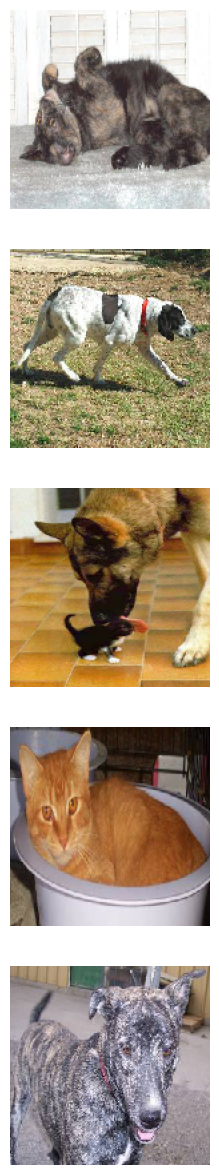

In [15]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])

In [342]:
# 5
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    height_shift_range=0.1,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
    )

In [343]:
# 6
train_data_gen = train_image_generator.flow_from_directory(
    batch_size=batch_size,
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    class_mode='categorical' 
)

#augmented_images = [train_data_gen[0][0][0] for i in range(5)]

#plotImages(augmented_images)

Found 2000 images belonging to 2 classes.


In [344]:
# Some specifics
print(
    "Format:", train_data_gen.data_format,"\n",
    "image shape:", train_data_gen.image_shape,"\n",
    "num_batches:", train_data_gen.num_batches,"\n",
    "num:classes:", train_data_gen.num_classes,"\n",
    "seed:", train_data_gen.seed,"\n",
    "target_size:", train_data_gen.target_size, "\n",
    "total batches seen:", train_data_gen.total_batches_seen,"\n",
    "multiprocessing", train_data_gen.use_multiprocessing
)

Format: channels_last 
 image shape: (150, 150, 3) 
 num_batches: 16 
 num:classes: 2 
 seed: None 
 target_size: (150, 150) 
 total batches seen: 0 
 multiprocessing False


In [627]:
# 7
# Base model
model = Sequential(
    [
        # Input layer
        Conv2D(32, (3,3), padding="same", input_shape = (150,150,3)),
        Activation("relu"),
        MaxPooling2D((2,2)),
        
        Conv2D(64, (3,3), padding="same"),
        Activation("relu"),
        MaxPooling2D((2,2)),

        Conv2D(128, (3,3), padding="same"),
        Activation("relu"),
        MaxPooling2D((2,2)),
        
        Conv2D(128, (3,3), padding="same"),
        Activation("relu"),
        MaxPooling2D((2,2)),
    ]
)

# Bottleneck for feature compression
model.add(Conv2D(64, (1,1)))
model.add(Activation("relu"))

# Prepare for Dense layers
model.add(Flatten())
#model.add(tf.keras.layers.GlobalAveragePooling2D()) 

# make the brain
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.4))

# Output layer
model.add(Dense(2, activation="softmax"))
    

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # this is the base rate
    loss= "categorical_crossentropy",
    metrics=["accuracy"]
)

In [629]:
# 8
#callbacks = [
#    tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
#]
history = model.fit(
    train_data_gen,
    #callbacks=callbacks,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data= val_data_gen,
    validation_steps= val_data_gen.samples // batch_size
)

model.summary()

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - accuracy: 0.4824 - loss: 0.6987 - val_accuracy: 0.5011 - val_loss: 0.6926
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 345ms/step - accuracy: 0.5234 - loss: 0.6934 - val_accuracy: 0.5022 - val_loss: 0.6923
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - accuracy: 0.5345 - loss: 0.6927 - val_accuracy: 0.5022 - val_loss: 0.6864
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 344ms/step - accuracy: 0.4922 - loss: 0.6913 - val_accuracy: 0.4989 - val_loss: 0.6853
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.5466 - loss: 0.6849 - val_accuracy: 0.5000 - val_loss: 0.7585
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 372ms/step - accuracy: 0.4766 - loss: 0.7712 - val_accuracy: 0.6228 - val_loss: 0.6354
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 38s 2s/step - accuracy: 0.6044 - loss: 0.6609 - val_accuracy: 0.6250 - val_loss: 0.6259
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 7s 345ms/step - accuracy: 0.5781 - loss: 0.6522 - val_accuracy: 0.6562 - v

Model: "sequential_54"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_222 (Conv2D)                  │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_170 (Activation)          │ (None, 150, 150, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_205 (MaxPooling2D)     │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_223 (Conv2D)                  │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_171 (Activation)          │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_206 (MaxPooling2D)     │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_224 (Conv2D)                  │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_172 (Activation)          │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_207 (MaxPooling2D)     │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_225 (Conv2D)                  │ (None, 18, 18, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_173 (Activation)          │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_208 (MaxPooling2D)     │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_226 (Conv2D)                  │ (None, 9, 9, 64)            │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_174 (Activation)          │ (None, 9, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 5184)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_116 (Dense)                    │ (None, 64)                  │         331,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_56 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_117 (Dense)                    │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,743,176 (6.65 MB)

 Trainable params: 581,058 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,162,118 (4.43 MB)

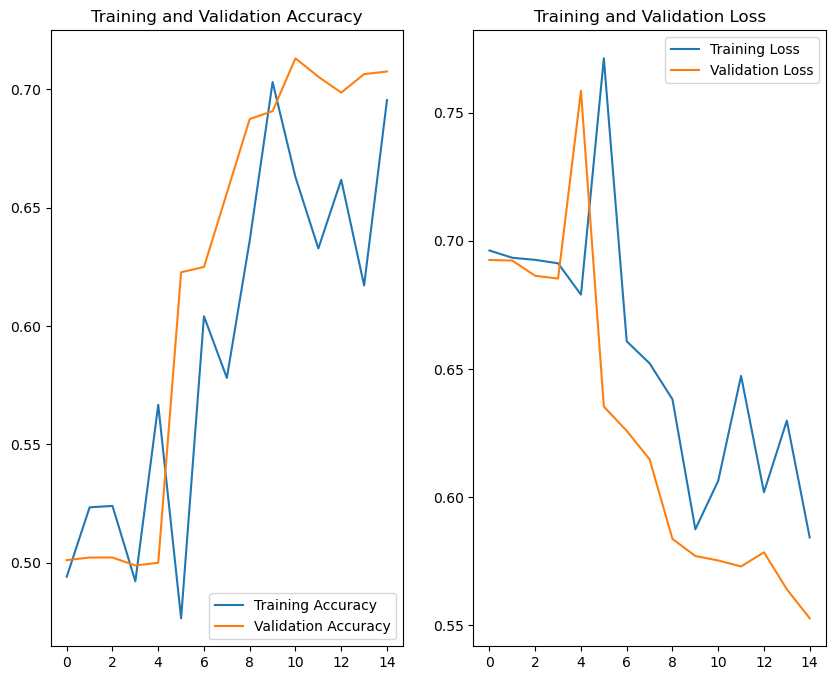

In [630]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [631]:
# 10 predict
test_Image = next(test_data_gen)
predictions = model.predict(test_Image)
probabilities = predictions[:,1]                        # categorical softmax
#probabilities = predictions[:,0]                        # binary - sigmoid
#probabilities = tf.nn.softmax(predictions)[:,1].numpy() # with from_logits=True


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


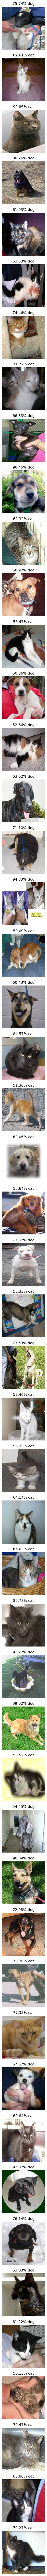

In [632]:
plotImages(test_Image, probabilities=probabilities)

In [633]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 76.0% of the images of cats and dogs.
You passed the challenge!


In [639]:
model.save(f"model_{round(percentage_identified)}_cat_good.keras")

In [93]:
model2 = tf.keras.models.load_model("model_74_cat_globalpooling.keras")
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_25 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 772,808 (2.95 MB)

 Trainable params: 257,602 (1006.26 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 515,206 (1.97 MB)